# Machine Learning

1. Supervised Learning
    1. **Regression (predict value)**
    1. Classification (predict label)
1. Unsupervised Learning
    1. Clustering 
    1. Dimensionality reduction

---

# Regression

* **Regression** problem: **predict a median housing price** ($1000). 

In [1]:
!pip install sklearn matplotlib seaborn pandas numpy

You should consider upgrading via the 'd:\python38\python.exe -m pip install --upgrade pip' command.


**Load the dataset**

In [2]:
from sklearn.datasets import load_boston

boston = load_boston() # toy dataset: sklearn Boston housing price 
# boston.keys()
# type(boston.data)
# print(boston.DESCR)

# Attribute Information (in order):
# - CRIM     per capita crime rate by town
# - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
# - INDUS    proportion of non-retail business acres per town
# - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# - NOX      nitric oxides concentration (parts per 10 million)
# - RM       average number of rooms per dwelling
# - AGE      proportion of owner-occupied units built prior to 1940
# - DIS      weighted distances to five Boston employment centres
# - RAD      index of accessibility to radial highways
# - TAX      full-value property-tax rate per $10,000
# - PTRATIO  pupil-teacher ratio by town
# - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# - LSTAT    % lower status of the population

# TARGET:
# - MEDV     Median value of owner-occupied homes in $1000's

# boston.target

**Analyse the Dataset with Pandas**

In [29]:
import pandas as pd
df = pd.DataFrame(boston.data, columns=boston.feature_names) # put it into dataframe for analysis
df['PRICE'] = boston.target
df.head()

# boston.data.shape # (506, 13)
# boston.target.shape # (506,)

# Null value handling
# df.info() # confirmed no null value in this df
# df.isnull().sum()

# stats
# df.describe()
# df.CRIM.describe()
# df.PRICE.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

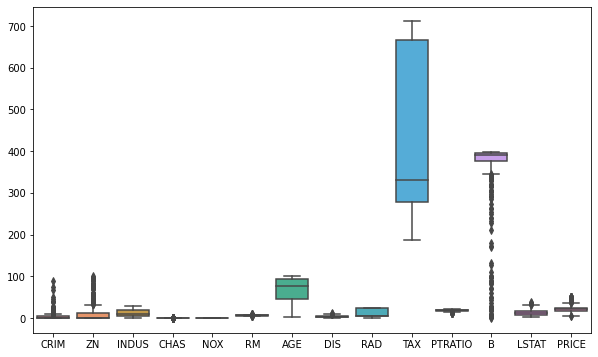

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df)

Text(0.5, 0, 'Median Price ($1000)')

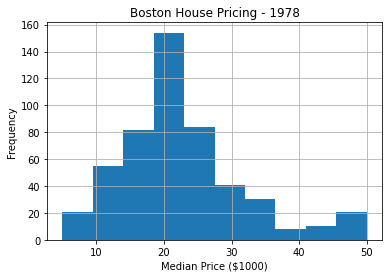

In [5]:
df.PRICE.hist()
plt.title('Boston House Pricing - 1978')
plt.ylabel('Frequency')
plt.xlabel('Median Price ($1000)')

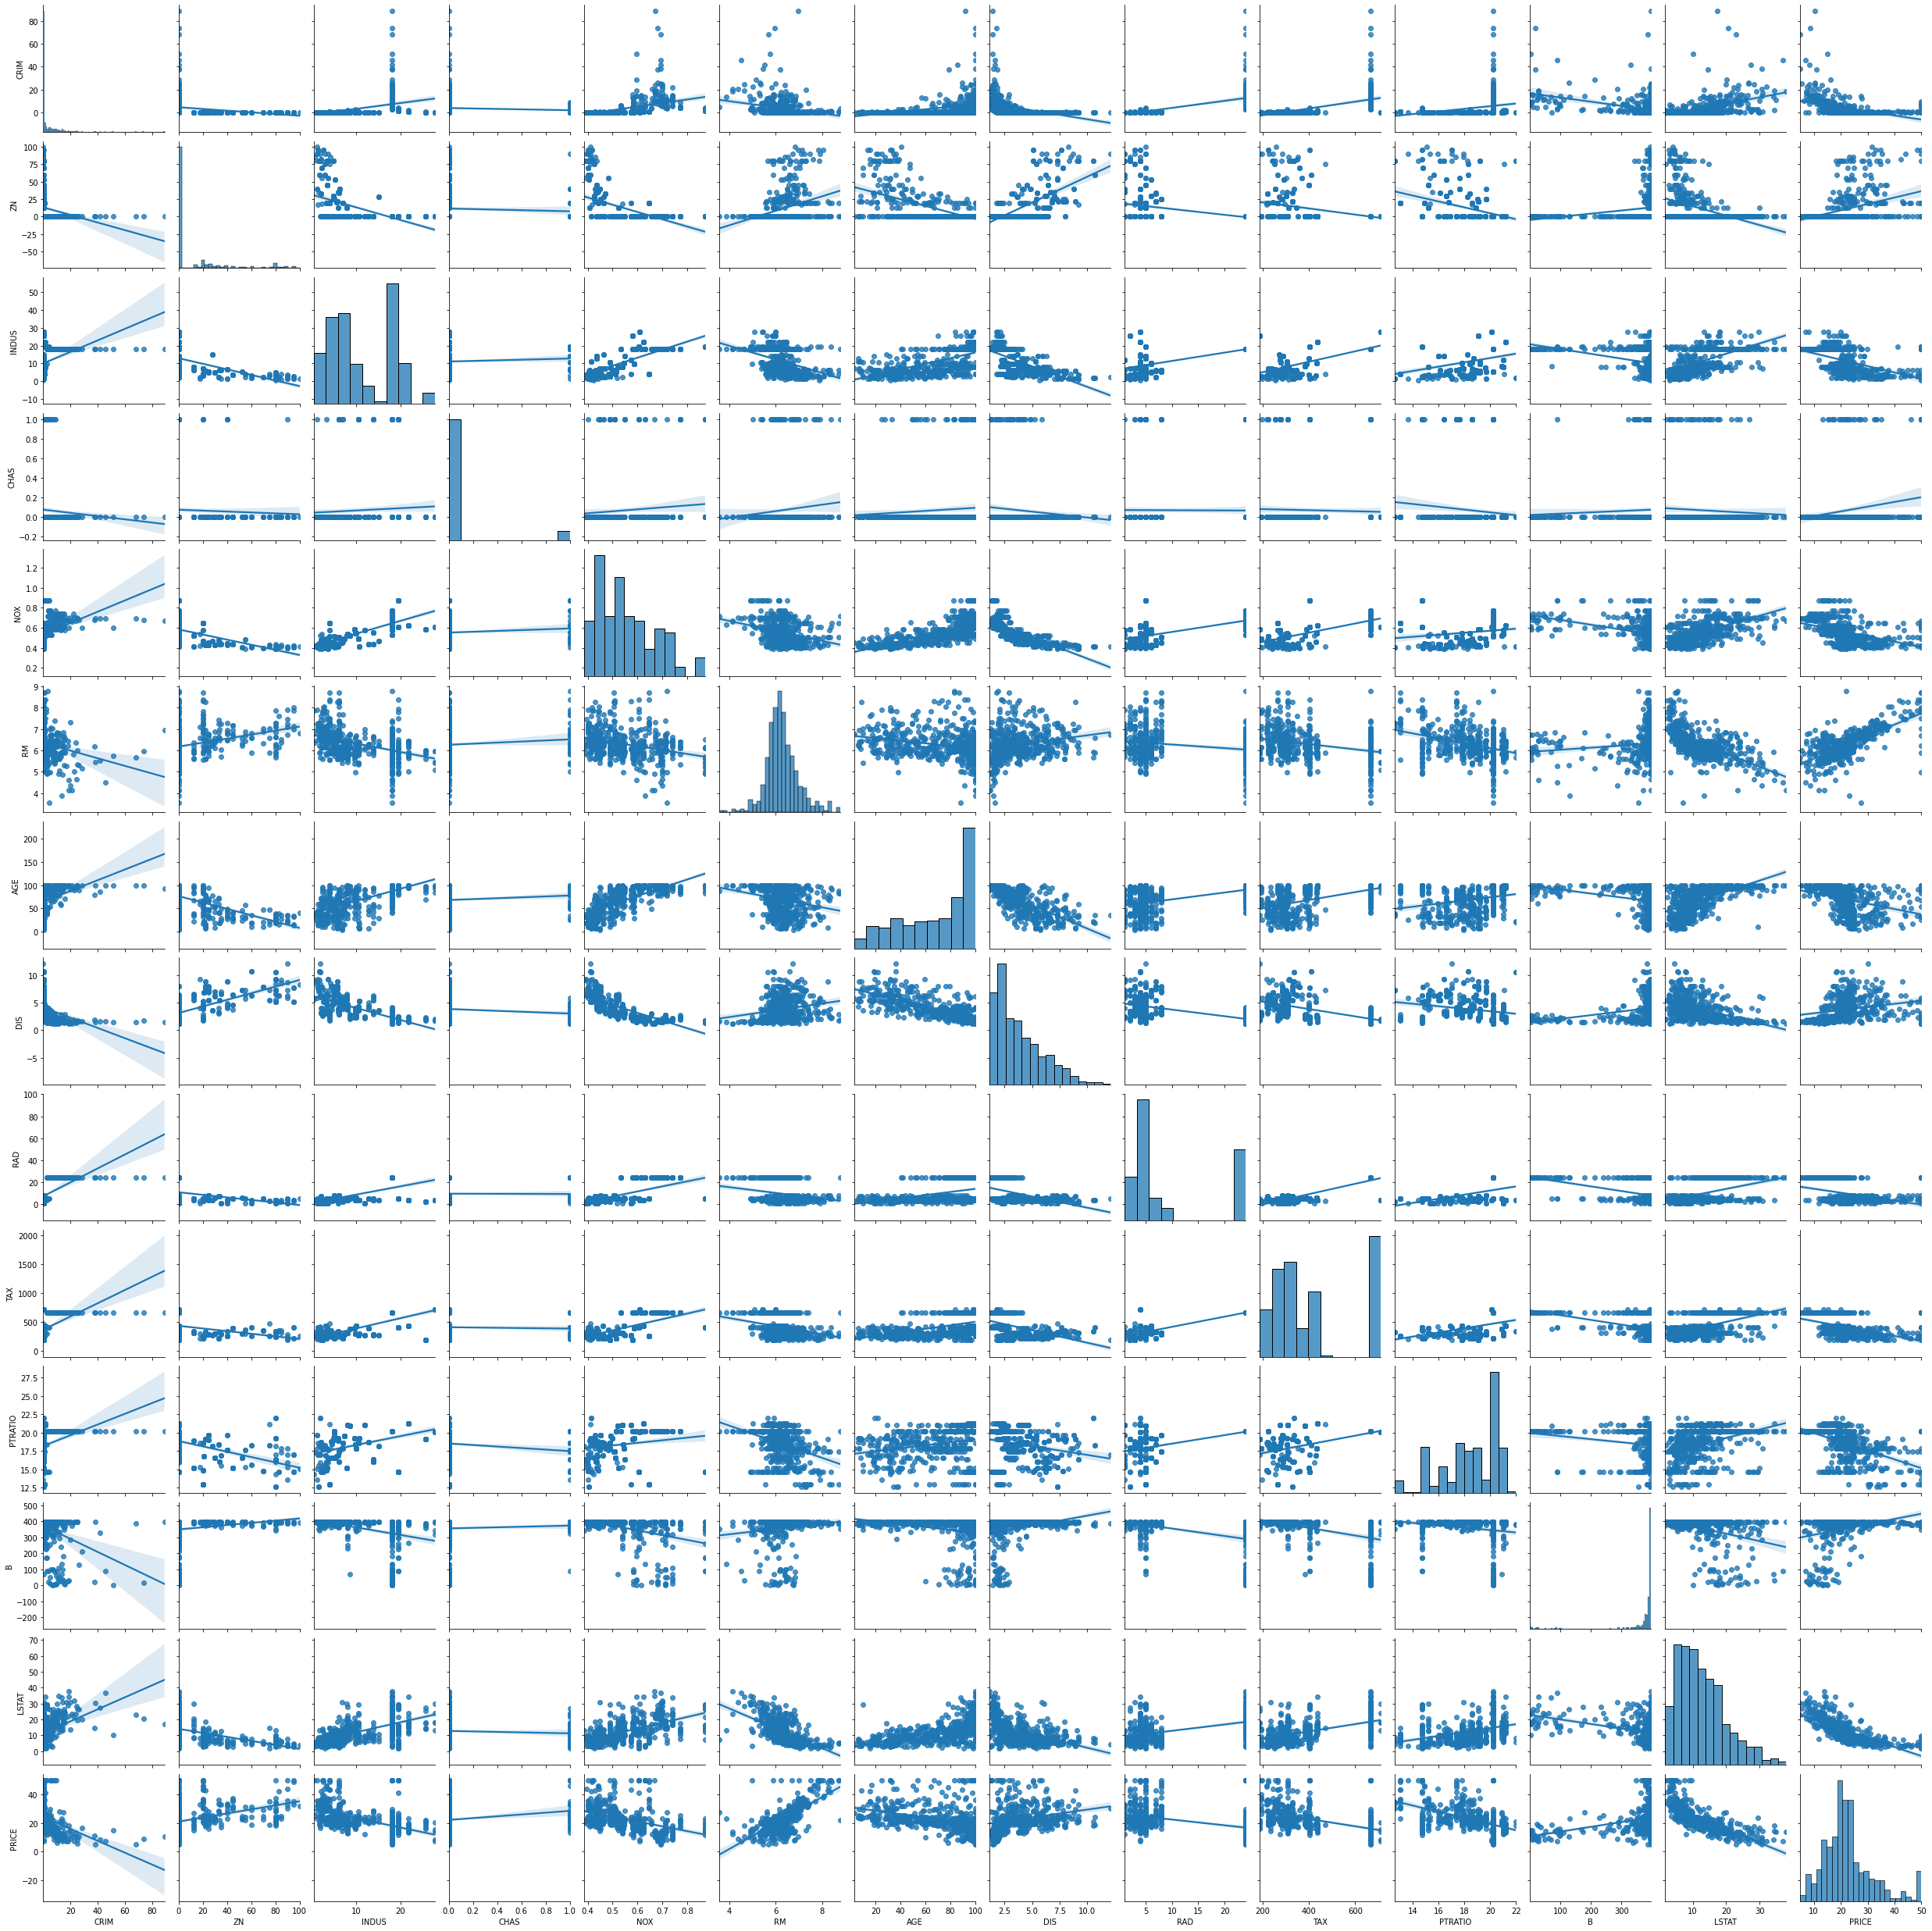

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.pairplot(df, x_vars=boston.feature_names, y_vars=['PRICE'], kind='reg')
sns.pairplot(df, kind='reg')

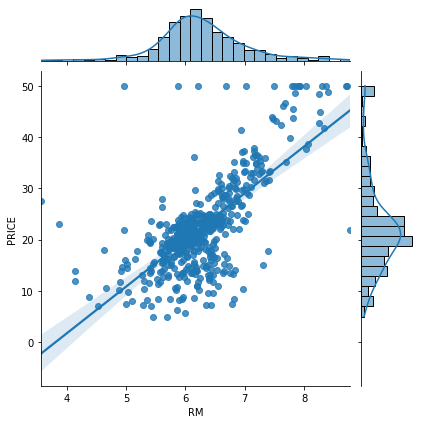

In [7]:
sns.jointplot(x=df.RM, y=df.PRICE, kind='reg')

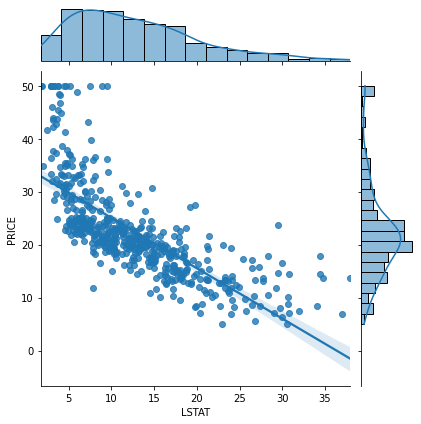

In [8]:
sns.jointplot(x=df.LSTAT, y=df.PRICE, kind='reg')

## Step 1: Preprocessing

### Prepare X, y

In [17]:
X = df.drop("PRICE", axis=1)
y = boston.target

### Data scaling

In [18]:
# StandardScaler for standardization
# MinMaxScaler for min-max normalization 
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
minMaxScaler = MinMaxScaler().fit(X)
X_processed = minMaxScaler.transform(X)
# X_processed = StandardScaler().fit_transform(X) # if you need standardization ( z=(x-u)/s, where u is mean, s is standard dev)

# if you want to use pandas dataframe
df_processed = pd.DataFrame(X_processed, columns=X.columns)
df_processed

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


<AxesSubplot:>

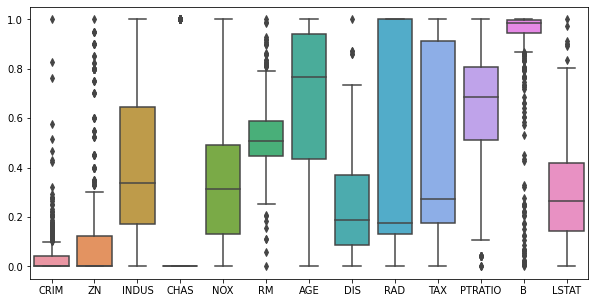

In [19]:
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=df_processed)

### Split the dataset (train_test_split)
* Split the data into **Training set** & **Testing set**
* **Training set** for training
* **Testing set** for performance evaluation

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=1)

# X_train.shape
# X_test.shape

(102, 13)

## Step 2 & 3: Training & evaluation

**Try different Regression models**
* https://scikit-learn.org/stable/supervised_learning.html

<img src='decision_tree_general.png' width='350'> <img src='random_forest.png' width='350'>

                                        RMSE    R-squared
 1. RandomForestRegressor               2.96    0.91
 2. KNeighborsRegressor                 4.64    0.78
 3. LinearRegression                    4.84    0.76
 4. DecisionTreeRegressor               5.61    0.68


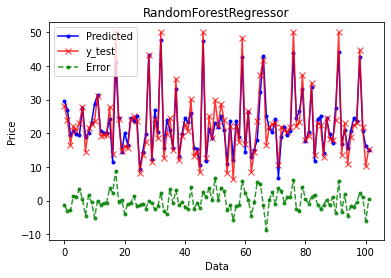

In [23]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import collections, operator
RunResult = collections.namedtuple('RunResult', 'model error pred r2')

# try some well-known regression algorithms
model_list = [
             LinearRegression(), 
             KNeighborsRegressor(),
             DecisionTreeRegressor(), 
             RandomForestRegressor(n_estimators=100),
            ]

result_list = []

for model in model_list:
    model.fit(X_train, y_train) # train using training set
    pred = model.predict(X_test) # evaluate the performance using test set
    mse = mean_squared_error(y_test, pred) # compute MSE
    r2 = r2_score(y_test, pred) # r2 score (r-square score, max 1, can be -ve)
    rmse = np.sqrt(mse)
    result_list.append(RunResult(model, rmse, pred, r2))
    
# sort the results by error and then print the result
result_list.sort(key=operator.attrgetter('error'))

space=' '
print(f'{space*40}RMSE{space*4}R-squared')
for i, result in enumerate(result_list):
    print(f'{i+1:2}. {type(result.model).__name__:30}    {result.error:6.2f}    {result.r2:.2f}')

best_model = result_list[0].model
lowest_error = result_list[0].error
best_pred = result_list[0].pred

# performance of the best model
x_index = np.arange(0, pred.shape[0])
dist = y_test - best_pred # compute distance between actual pt and predicted pt

plt.plot(x_index, pred,  marker='.', alpha=1, color='b', label='Predicted')
plt.plot(x_index, y_test, marker='x', alpha=0.8, color='r', label='y_test')
plt.plot(x_index, dist, marker='.', alpha=0.8, linestyle='--', color='g', label='Error')
plt.title(f'{type(best_model).__name__}' )
plt.ylabel('Price')
plt.xlabel('Data')
plt.legend()


**Cross-validated RMSE**

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5) # Warning: cv have to run 5 times!

rmse_cv = np.sqrt(-scores) # For sklearn, the higher the score, the better the performance. Error is the opposite, so the score is negative.
print(f'RMSE scores: {rmse_cv}')
print(f'RMSE mean: {rmse_cv.mean():.2f}')
print(f'RMSE std: {rmse_cv.std():.2f}')

# or you can put the cross_val_score to the previous for loop to evaluate the Cross-validated MSE for each algorithms

RMSE scores: [3.21735036 3.39440502 3.00772203 3.47202749 3.19730514]
RMSE mean: 3.26
RMSE std: 0.16


In [26]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
cv_results = cross_validate(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
#     print(len(cv_results))
print(cv_results.keys())
print('Fit time:' + str(cv_results['fit_time']))  # fit time of each split 
print('Score time:' + str(cv_results['score_time'])) # score time of each split
rmse_cv = np.sqrt(-cv_results['test_score'])
print('Test score:' + str(rmse_cv))

dict_keys(['fit_time', 'score_time', 'test_score'])
Fit time:[0.06301498 0.06201386 0.06101394 0.06101441 0.06101418]
Score time:[0.00099993 0.00100017 0.         0.         0.        ]
Test score:[3.08100028 3.07462468 3.18055527 3.93578764 2.91601673]


In [27]:
result_list = [] # clear the result list first
for model in model_list:
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=10) # Warning: cv have to run 5 times!
    rmse_cv = np.sqrt(-scores) 
    result_list.append(RunResult(model, rmse_cv.mean(), None, 0))
    
# sort the results by error and then print the result
result_list.sort(key=operator.attrgetter('error'))

space=' '
print(f'{space*40}RMSE{space*4}')
for i, result in enumerate(result_list):
    print(f'{i+1:2}. {type(result.model).__name__:30}    {result.error:6.2f}')

                                        RMSE    
 1. RandomForestRegressor               3.21
 2. DecisionTreeRegressor               4.01
 3. LinearRegression                    4.82
 4. KNeighborsRegressor                 4.97


Text(0.5, 1.0, 'Distribution of Errors')

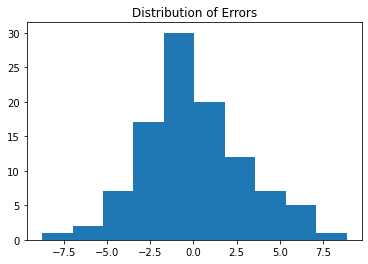

In [28]:
# Errors distribution
dist = y_test - best_pred
plt.hist(dist)
plt.title('Distribution of Errors')

## Step  4: Prediction

In [31]:
rows =[[0.02631, 0.0, 7.5, 0.0, 0.469, 6.421, 78.9, 4.99, 2.1, 242.0, 17.8, 396.90, 9.14]]

rows_processed = minMaxScaler.transform(rows) # no fit
# rows_processed
unseen_pred = best_model.predict(rows_processed)
print(f'Predicted price: ${unseen_pred[0]*1000:.2f}')

Predicted price: $22417.00
